# Модель тесного мира Уотса-Строгатса. Случайные сети

__Авторы задач: Макрушин С.В (SVMakrushin@fa.ru), Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 2: Модели"
* Документация:
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.geometric.random_geometric_graph.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.average_shortest_path_length.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html

## Вопросы для совместного обсуждения

1\. Обсудите модель тесного мира Уотса-Строгатса

2\. Обсудите конфигурационную модель и модель случайного геометрического графа

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. C помощью реализации модели Уотса-Строгатса из `networkx` сгенерируйте небольшие сети одного размера (в смысле количества узлов) с разным `p` и визуализируйте их. В качестве `p` рассмотрите несколько значений, равномерно распределенных на отрезке [0, 1]. При визуализации зафиксируйте положение узлов для всех графов.

- [x] Проверено на семинаре

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

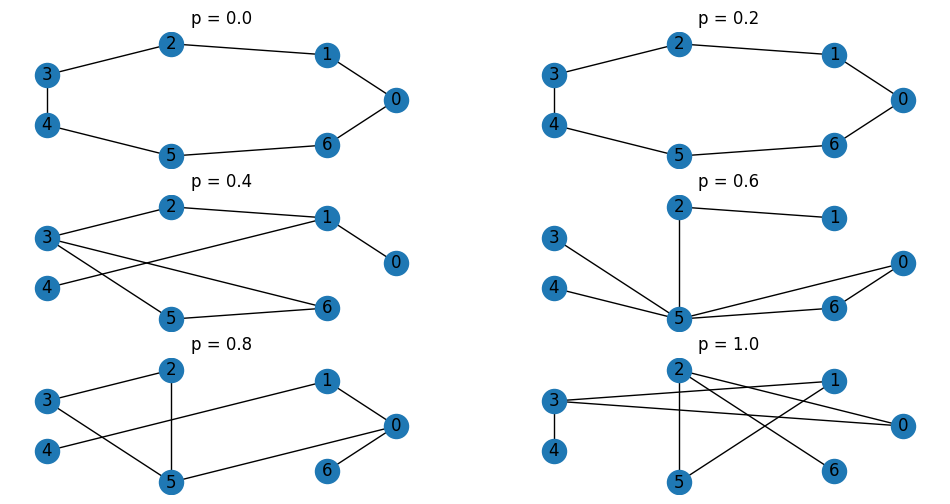

In [2]:
G = nx.watts_strogatz_graph(7, k=3, p=0)
p_values = np.arange(0,1.1,0.2)
pos = nx.circular_layout(G)
plt.figure(figsize=(12,6))
for i, p in enumerate(p_values):
    p = round(p,1)
    plt.subplot(3, 2, i+1)
    G = nx.watts_strogatz_graph(7, k=3, p=p)
    nx.draw(G, pos, with_labels=True)
    plt.title(f'p = {p}')
plt.show()

<p class="task" id="2"></p>

2\.  C помощью реализации модели Уотса-Строгатса из `networkx` сгенерируйте сети с кол-вом узлов порядка 1000 и с разным p. В качестве `p` рассмотрите несколько значений, равномерно распределенных по логарифмической шкале на отрезке $[10^{-4}, 1]$.

Визуализируйте результаты пересвязывания, построив на одном графике относительные изменения среднего коэффициента кластеризации и средней длины пути относительно варианта сети без пересвязывания. Обозначьте точки разных графиков различными маркерами и цветами. Добавьте легенду.

- [ ] Проверено на семинаре

In [3]:
n = 1000
p_values = np.logspace(-4, 0, num=10)

In [4]:
G = nx.Graph()
avg_clustering_changes = []
avg_path_length_changes = []

for p in p_values:
    ws_graph = nx.watts_strogatz_graph(n, k=10, p=p)

    original_avg_clustering = nx.average_clustering(ws_graph)
    original_avg_path_length = nx.average_shortest_path_length(ws_graph)
    rewire_graph = nx.connected_watts_strogatz_graph(n, k=10, p=p)

    rewire_avg_clustering = nx.average_clustering(rewire_graph)
    rewire_avg_path_length = nx.average_shortest_path_length(rewire_graph)

    avg_clustering_change = (rewire_avg_clustering - original_avg_clustering) / original_avg_clustering
    avg_path_length_change = (rewire_avg_path_length - original_avg_path_length) / original_avg_path_length

    avg_clustering_changes.append(avg_clustering_change)
    avg_path_length_changes.append(avg_path_length_change)

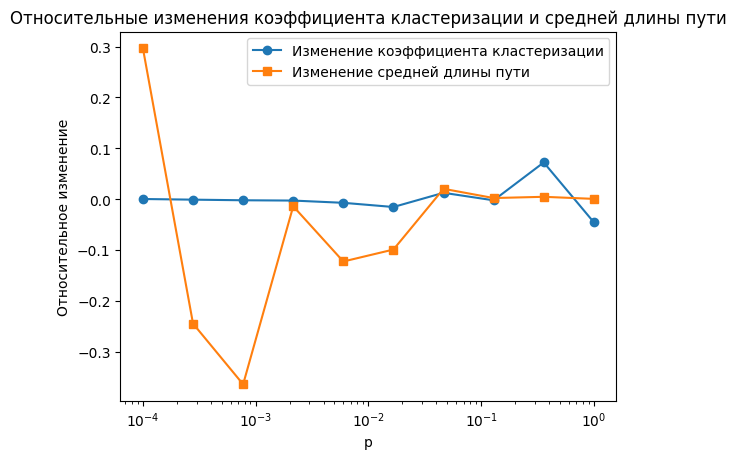

In [5]:
plt.plot(p_values, avg_clustering_changes, marker='o', label='Изменение коэффициента кластеризации')
plt.plot(p_values, avg_path_length_changes, marker='s', label='Изменение средней длины пути')
plt.xlabel('p')
plt.ylabel('Относительное изменение')
plt.xscale('log')
plt.legend()
plt.title('Относительные изменения коэффициента кластеризации и средней длины пути')
plt.show()

<p class="task" id="3"></p>

3\. Реализуйте алгоритм Уотса-Строгатса с целочисленными параметрами  `n` и `p`:

* `n`  - количество узлов в исходной сети (считаем, что исходная сеть является одномерной замкнутой решеткой со степенью узлов 2 - замкнутый путь);
* `p`   - вероятность пересвязывания каждого узла.

Проверьте результат, визуализировав несколько графов одного размера с фиксированными координатами узлов, полученные при разных значениях `p`.

- [ ] Проверено на семинаре

In [6]:
import random

In [7]:
def watts_strogatz_graph(n, p):
    G = nx.Graph()

    nodes = list(range(n))
    G.add_nodes_from(nodes)

    for i in range(n):
        for j in range(1, n//2 + 1):
            if random.random() < p:
                k = (i + j) % n
                G.add_edge(i, k)

    return G

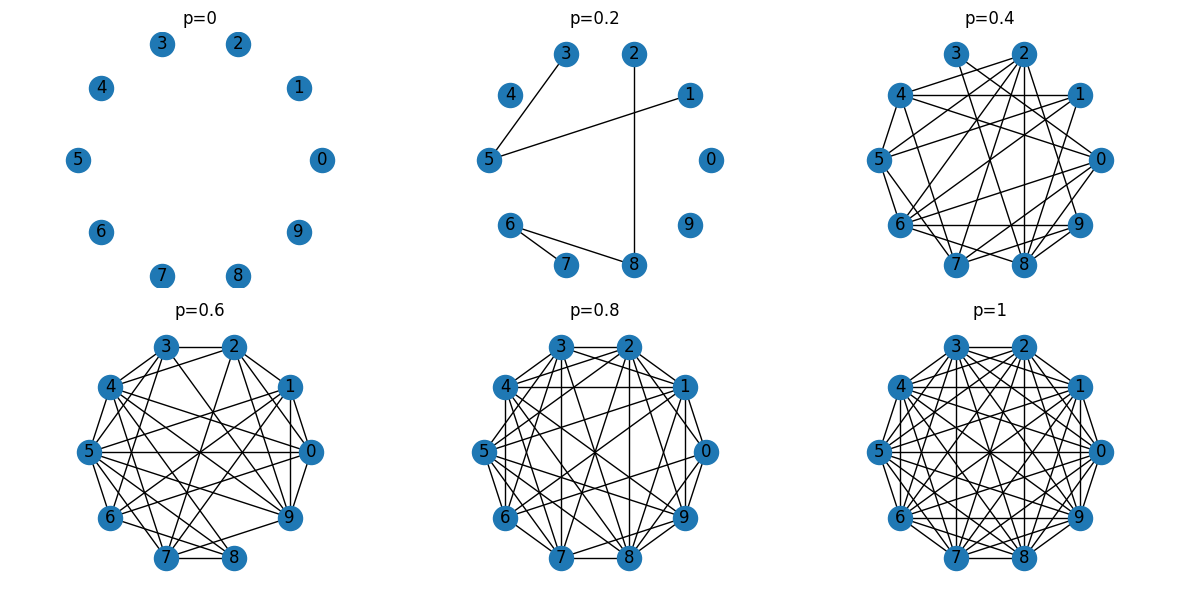

In [8]:
n = 10
p_values = [0, 0.2, 0.4, 0.6, 0.8, 1]

pos = nx.circular_layout(range(n))

plt.figure(figsize=(12, 6))
for p in p_values:
    G = watts_strogatz_graph(n, p)

    plt.subplot(2, 3, p_values.index(p) + 1)
    nx.draw(G, pos, with_labels=True)
    plt.title(f'p={p}')
    plt.axis('equal')

plt.tight_layout()
plt.show()

<p class="task" id="4"></p>

4\. Создайте неориентированный граф на основе набора данных fb-pages-food с сайта https://networkrepository.com/ . C помощью `nx.configuration_model` постройте рандомизированный аналог данной сети. Визуализируйте исходный и рандомизированный граф рядом. Проверьте, совпадают ли распределения степеней узлов исходного и рандомизированного графа.

- [ ] Проверено на семинаре

In [9]:
import pandas as pd

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
edges_file = '/content/drive/MyDrive/fb-pages-food.edges'
nodes_file = '/content/drive/MyDrive/fb-pages-food.nodes'

edges_data = np.loadtxt(edges_file, dtype=str, delimiter=',')
nodes_df = pd.read_csv(nodes_file, dtype=str)

In [21]:
G_original = nx.from_edgelist(edges_data)
G_randomized = nx.configuration_model(list(dict(G_original.degree()).values()))

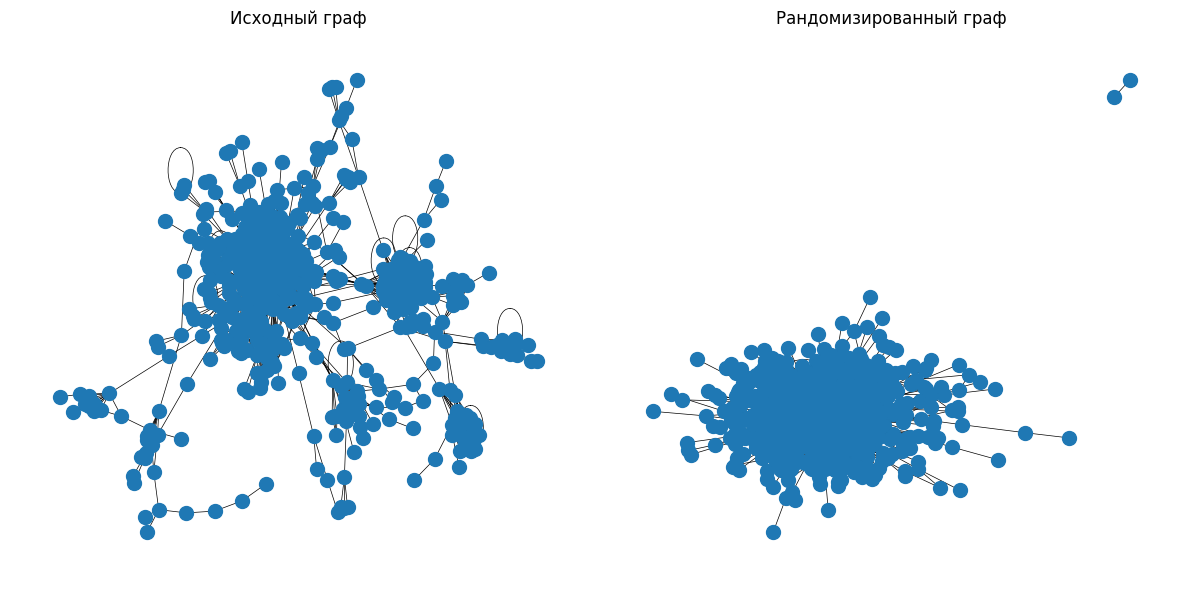

In [27]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
nx.draw(G_original, node_size=100, width=0.5)
plt.title('Исходный граф')

plt.subplot(1, 2, 2)
nx.draw(G_randomized, node_size=100, width=0.5)
plt.title('Рандомизированный граф')

plt.tight_layout()
plt.show()

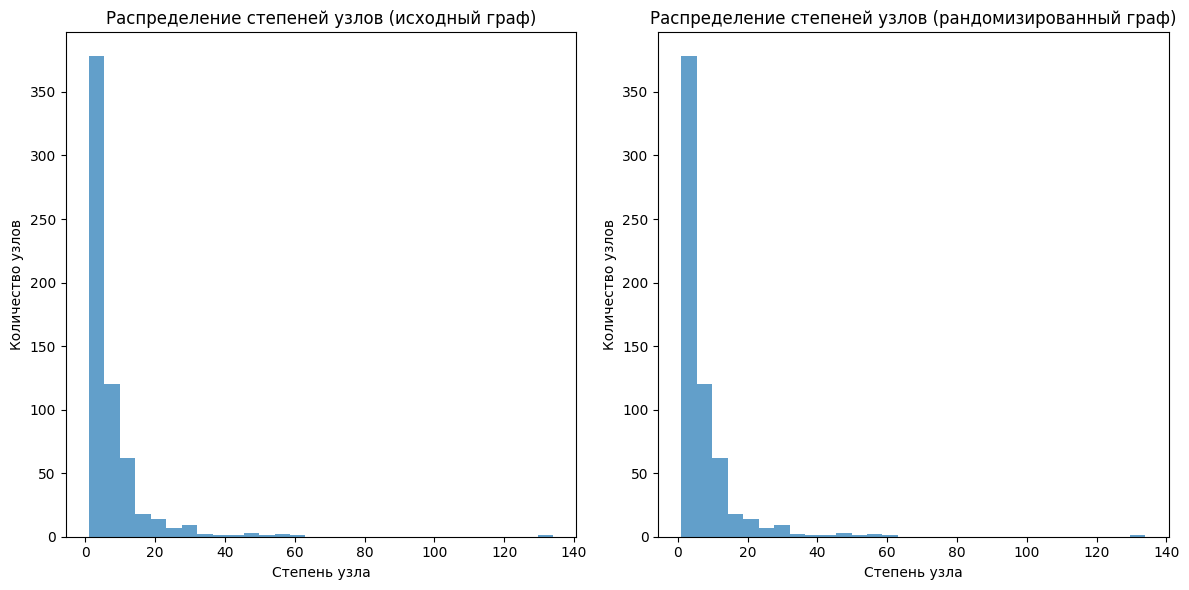

In [25]:
degrees_original = [degree for node, degree in G_original.degree()]
degrees_randomized = [degree for node, degree in G_randomized.degree()]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(degrees_original, bins=30, alpha=0.7)
plt.xlabel('Степень узла')
plt.ylabel('Количество узлов')
plt.title('Распределение степеней узлов (исходный граф)')

plt.subplot(1, 2, 2)
plt.hist(degrees_randomized, bins=30, alpha=0.7)
plt.xlabel('Степень узла')
plt.ylabel('Количество узлов')
plt.title('Распределение степеней узлов (рандомизированный граф)')

plt.tight_layout()
plt.show()

<p class="task" id="5"></p>

5\. C помощью реализации алгоритма постоения случайного геометрического графа из `networkx` сгенерируйте сеть с кол-вом узлов порядка 500 при радиусе `r=0.2` и $L^2$ метрикой для вычисления расстояния. Визуализируйте полученный граф, уменьшив размер узлов и сделав цвет ребер черным прозрачным (используйте RGBA). Визуализируйте распределение степеней узлов полученного графа.

Повторите решение задачи, использовав $L^1$ метрику для вычисления расстояния. Сравните результаты и сделайте выводы.

- [ ] Проверено на семинаре

In [14]:
num_nodes = 500
radius = 0.2
alpha = 0.5

In [15]:
G = nx.random_geometric_graph(num_nodes, radius, dim=2)

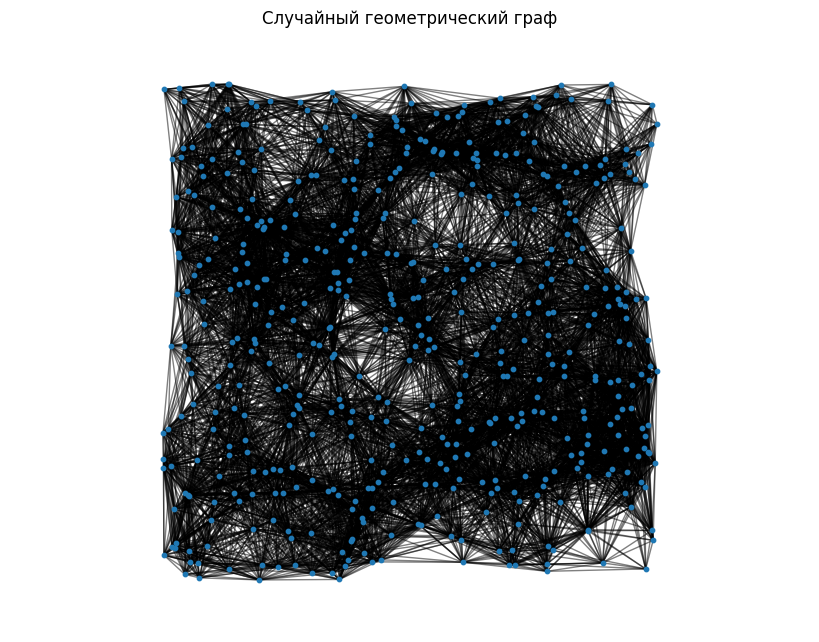

In [16]:
plt.figure(figsize=(8, 6))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, node_size=10, edge_color=(0, 0, 0, alpha), with_labels=False)
plt.title('Случайный геометрический граф')
plt.axis('equal')
plt.show()

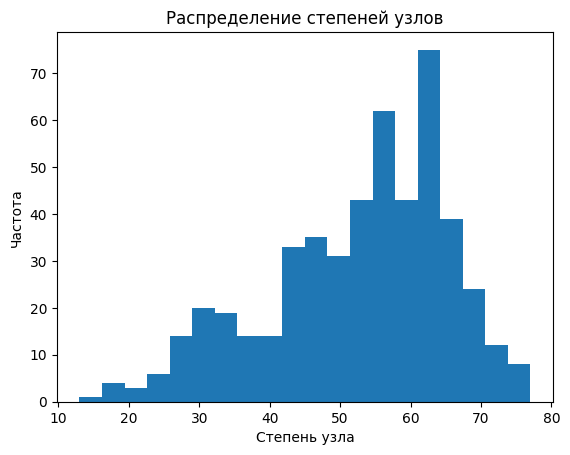

In [17]:
degree_sequence = [degree for _, degree in G.degree()]

plt.hist(degree_sequence, bins=20)
plt.xlabel('Степень узла')
plt.ylabel('Частота')
plt.title('Распределение степеней узлов')
plt.show()

In [30]:
G_l1 = nx.random_geometric_graph(num_nodes, radius, dim=2, p=1)

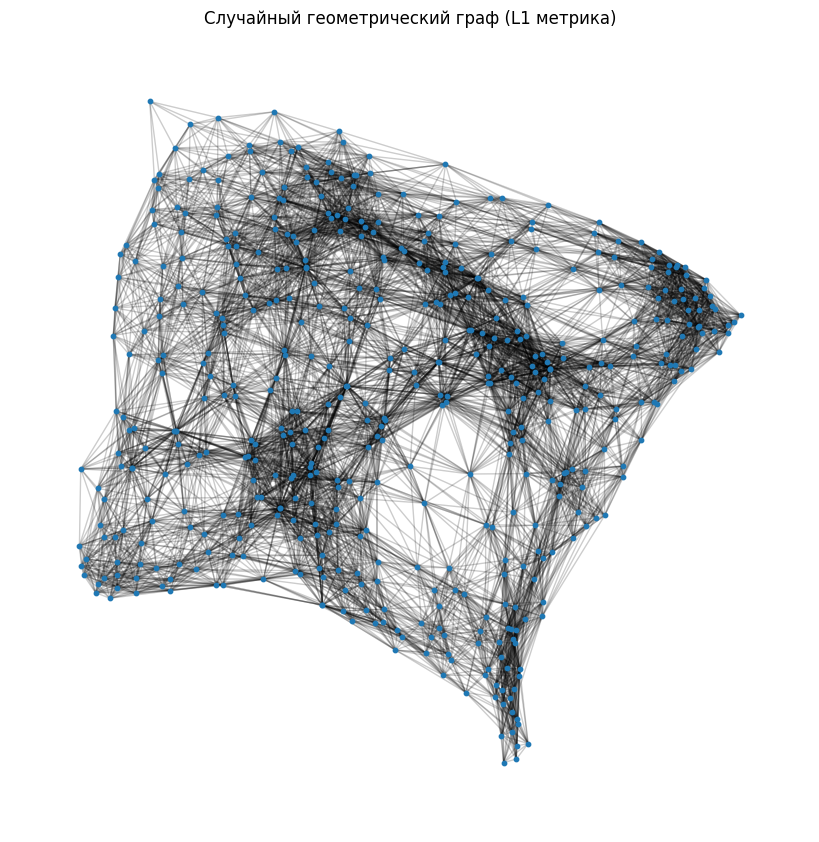

In [31]:
plt.figure(figsize=(8, 8))
nx.draw(G_l1, node_size=10, edge_color=(0, 0, 0, 0.2))
plt.title('Случайный геометрический граф (L1 метрика)')
plt.show()

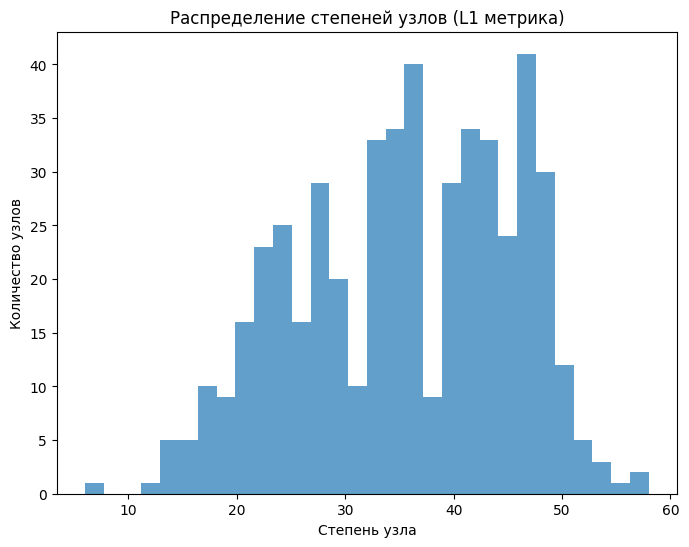

In [32]:
degrees_l1 = [degree for node, degree in G_l1.degree()]

plt.figure(figsize=(8, 6))
plt.hist(degrees_l1, bins=30, alpha=0.7)
plt.xlabel('Степень узла')
plt.ylabel('Количество узлов')
plt.title('Распределение степеней узлов (L1 метрика)')
plt.show()

В L^2  больше частота степени узла и количество узлов, а также узлы более плотны между собой.